1. Fetch dataand load dataset
2. split train-70% val-30%
3. Train loader, val loader
4. Prepare model
5. Loss function
6. optimizer
7. Plot graphs w.r.t loss vs train accuracy and val accuracy

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import torch,random,json
from torchvision import transforms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv(Path.joinpath(Path.cwd().parent,'dataset','5_model_df.csv'))
df.drop(columns=['runs_off_bat', 'extras','player_dismissed'],inplace=True)
df

,venue,innings,batting_team,bowling_team,bat1,bat2,bat3,bat4,bat5,bat6,...,bat8,bat9,bat10,bow1,bow2,bow3,bow4,bow5,bow6,Total_score
0,15,1,2,5,220,36,205.0,0.0,0.0,0.0,...,0.0,0.0,0.0,171,275,16.0,0.0,0.0,0.0,61
1,15,2,5,2,186,264,257.0,97.0,51.0,155.0,...,0.0,0.0,0.0,18,109,8.0,0.0,0.0,0.0,26
2,23,1,0,3,174,148,141.0,0.0,0.0,0.0,...,0.0,0.0,0.0,46,268,105.0,0.0,0.0,0.0,53
3,23,2,3,0,107,105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,126,200,0.0,0.0,0.0,0.0,63
4,10,1,6,1,252,270,235.0,130.0,0.0,0.0,...,0.0,0.0,0.0,96,43,189.0,0.0,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,2,4,0,183,196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,82,225,171.0,0.0,0.0,0.0,58
1455,1,1,6,7,94,269,240.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44,297,254.0,154.0,0.0,0.0,42
1456,1,2,7,6,146,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,167,208,58.0,49.0,0.0,0.0,57
1457,18,1,3,1,173,136,48.0,63.0,0.0,0.0,...,0.0,0.0,0.0,109,152,109.0,40.0,0.0,0.0,39


In [29]:
mms_data = {}
for col in df.columns:
    mms_data[col] = {'min' : float(df[col].min()),'max' : float(df[col].max())}

with open(Path.joinpath(Path.cwd().parent,'dataset','min_max_norm_df.json'),'w') as f:
    json.dump(mms_data,f)

In [4]:
input_params = ['venue', 'innings', 'batting_team', 'bowling_team', 'bat1', 'bat2', 'bat3', 'bat4', 'bat5', 'bat6',
                    'bat7', 'bat8', 'bat9', 'bat10', 'bow1', 'bow2', 'bow3', 'bow4', 'bow5', 'bow6']

output_param = ['Total_score']

# Normalize DataFrame

In [5]:
mms = MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(df),columns=df.columns)
df_norm

,venue,innings,batting_team,bowling_team,bat1,bat2,bat3,bat4,bat5,bat6,...,bat8,bat9,bat10,bow1,bow2,bow3,bow4,bow5,bow6,Total_score
0,0.441176,0.0,0.285714,0.714286,0.802198,0.129630,0.745455,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.513595,0.827273,0.048193,0.000000,0.0,0.0,0.572816
1,0.441176,1.0,0.714286,0.285714,0.677656,0.974074,0.934545,0.354015,0.186131,0.574074,...,0.0,0.0,0.0,0.051360,0.324242,0.024096,0.000000,0.0,0.0,0.233010
2,0.676471,0.0,0.000000,0.428571,0.633700,0.544444,0.512727,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.135952,0.806061,0.316265,0.000000,0.0,0.0,0.495146
3,0.676471,1.0,0.428571,0.000000,0.388278,0.385185,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.377644,0.600000,0.000000,0.000000,0.0,0.0,0.592233
4,0.294118,0.0,0.857143,0.142857,0.919414,0.996296,0.854545,0.474453,0.000000,0.000000,...,0.0,0.0,0.0,0.287009,0.124242,0.569277,0.000000,0.0,0.0,0.368932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.029412,1.0,0.571429,0.000000,0.666667,0.722222,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.244713,0.675758,0.515060,0.000000,0.0,0.0,0.543689
1455,0.029412,0.0,0.857143,1.000000,0.340659,0.992593,0.872727,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.129909,0.893939,0.765060,0.463855,0.0,0.0,0.388350
1456,0.029412,1.0,1.000000,0.857143,0.531136,0.366667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.501511,0.624242,0.174699,0.147590,0.0,0.0,0.533981
1457,0.529412,0.0,0.428571,0.142857,0.630037,0.500000,0.174545,0.229927,0.000000,0.000000,...,0.0,0.0,0.0,0.326284,0.454545,0.328313,0.120482,0.0,0.0,0.359223


# Split Dataset 

In [6]:
train_ds,val_ds = train_test_split(df_norm,test_size=0.2,shuffle=True)
print(train_ds.shape,val_ds.shape)

(1167, 21) (292, 21)


In [7]:
x_train = torch.tensor(train_ds[input_params].values.astype(np.float32))

y_train = torch.tensor(train_ds[output_param].values.astype(np.float32))

print(x_train.shape,y_train.shape)

torch.Size([1167, 20]) torch.Size([1167, 1])


In [8]:
x_val = torch.tensor(val_ds[input_params].values.astype(np.float32))

y_val = torch.tensor(val_ds[output_param].values.astype(np.float32))

print(x_val.shape,y_val.shape)

torch.Size([292, 20]) torch.Size([292, 1])


In [9]:
x_val[5],y_val[5]

(tensor([0.5882, 0.0000, 0.4286, 0.1429, 0.7436, 0.3926, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2538, 0.0818, 0.6687, 0.9729,
         0.0000, 0.0000]),
 tensor([0.6311]))

# Dataset and DataLoader

In [10]:
train_ds = torch.utils.data.TensorDataset(x_train,y_train)
test_ds  = torch.utils.data.TensorDataset(x_val,y_val)
train_ds[:3]

(tensor([[0.2941, 1.0000, 0.1429, 1.0000, 0.1978, 0.9519, 0.9236, 0.2774, 0.4781,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9789, 0.5970, 0.3223, 0.0151,
          0.0000, 0.0000],
         [0.2353, 0.0000, 1.0000, 0.5714, 0.0733, 0.7741, 0.4218, 0.2007, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8278, 0.8545, 0.6777, 0.0000,
          0.0000, 0.0000],
         [0.7647, 1.0000, 0.2857, 0.8571, 0.8462, 0.1667, 0.7491, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3233, 0.2636, 0.3765, 0.1355,
          0.0000, 0.0000]]),
 tensor([[0.3592],
         [0.4078],
         [0.4951]]))

In [11]:
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=10,shuffle=True)
test_dl  = torch.utils.data.DataLoader(test_ds,batch_size=5,shuffle=True)

for xb,yb in train_dl:
    print(xb)
    print(yb)
    break


tensor([[0.4706, 1.0000, 0.0000, 0.4286, 0.6337, 0.5444, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2598, 0.7545, 0.8434, 0.3584,
         0.0000, 0.0000],
        [0.6471, 1.0000, 0.8571, 0.4286, 0.6996, 0.3444, 0.8727, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1148, 0.6212, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.3824, 1.0000, 0.0000, 0.7143, 0.2491, 0.5185, 0.2691, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5589, 0.7727, 0.3163, 0.0000,
         0.0000, 0.0000],
        [0.7941, 1.0000, 0.1429, 0.2857, 0.2418, 0.9519, 0.9309, 0.2007, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1360, 0.5091, 0.2922, 0.6988,
         0.0000, 0.0000],
        [0.2647, 1.0000, 0.2857, 0.5714, 0.8462, 0.1667, 0.7491, 0.5912, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4320, 0.3364, 0.3916, 0.2530,
         0.0000, 0.0000],
        [0.6471, 0.0000, 0.4286, 1.0000, 0.4212, 0.1741, 0.0

# Define model

In [12]:
#from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out



In [13]:
from torchsummary import summary

model = linearRegression(x_train.shape[1],y_train.shape[1])
summary(model,input_size=(1,20))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]              21
Total params: 21
Trainable params: 21
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Train and Test model 

In [15]:

from tqdm import tqdm

train_losses = []
test_losses = []


def train(model,train_loader,optimizer,test_loader,epoch):
    model.train()
    pbar = tqdm(train_loader)

    correct, processed  = 0,0
    for batch_idx, (data, target) in enumerate(pbar):
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterian(y_pred,target)
        train_losses.append(loss)
        # Backpropagation
        loss.backward()
        optimizer.step()

        processed = processed + len(data)
        #import pdb;pdb.set_trace()

        pbar.set_description(desc= f'Epoach \t= {epoch}\tTrain Loss \t= {loss.item():0.4f} Batch_id={batch_idx} ')

    #def test(model,test_loader):
    model.eval()
    pbar = tqdm(test_loader)
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(pbar):
            y_pred = model(data)
            loss = criterian(y_pred,target)
            test_losses.append(loss)

            pbar.set_description(desc = f'Epoach \t= {epoch}\tTest Loss \t= {loss.item():0.4f}')



In [16]:
lr = 1e-3

criterian = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = lr)

In [18]:
for epoch in range(1,51):
    #print('### Epoch : {}'.format(epoch)) 
    train(model,train_dl,optimizer,test_dl,epoch)
    #test(model,test_dl)

Epoach 	= 50	Test Loss 	= 0.1336: 100%|██████████| 59/59 [00:00<00:00, 280.25it/s]


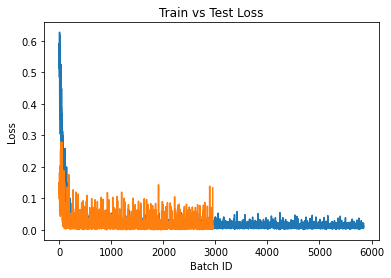

In [19]:
plt.clf()
plt.title('Train vs Test Loss')
plt.xlabel('Batch ID')
plt.ylabel('Loss')
plt.plot(train_losses)
plt.plot(test_losses);

In [20]:
torch.save(model.state_dict(),'iplscorePred.pth')

In [21]:
loaded_model = linearRegression(20,1)
loaded_model.load_state_dict(torch.load('iplscorePred.pth'))
loaded_model.eval()

linearRegression(
  (linear): Linear(in_features=20, out_features=1, bias=True)
)

In [25]:
def unNormalize_output(index , pred_norm = None, actual_norm = None, col_name = 'Total_score' ):
    print(f'### index : {index}')

    #print('### Normalized :\n\tpredicted Value \t: {}\n\tActual Value \t\t: {}'.format(loaded_model(x_val[index]).item()   ,    y_val[index].item()))

    print('### De-Normalized :\n\tpredicted Value \t: {}\n\tActual Value \t\t: {}'.format(loaded_model(x_val[index]).item()*(mms_data[col_name]['max'] - mms_data[col_name]['min']) + mms_data[col_name]['min']   ,   y_val[index].item()*(mms_data[col_name]['max'] - mms_data[col_name]['min']) + mms_data[col_name]['min']))



In [28]:

for _ in range(5):
    unNormalize_output(random.randint(0,x_val.shape[0]))

### index : 138
### De-Normalized :
	predicted Value 	: 33.31716212630272
	Actual Value 		: 50.99999988079071
### index : 284
### De-Normalized :
	predicted Value 	: 43.89028266072273
	Actual Value 		: 43.00000134110451
### index : 179
### De-Normalized :
	predicted Value 	: 47.18019610643387
	Actual Value 		: 79.00000244379044
### index : 166
### De-Normalized :
	predicted Value 	: 29.066994935274124
	Actual Value 		: 50.000000447034836
### index : 215
### De-Normalized :
	predicted Value 	: 47.92745065689087
	Actual Value 		: 44.00000077486038
